# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests 

from scipy.stats import linregress
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started codeA

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
   
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    record_count += 1

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | west bay
Processing Record 5 of Set 1 | tralee
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | bodaybo
Processing Record 8 of Set 1 | nichinan
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | thinadhoo
Processing Record 17 of Set 1 | nadi
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | p

In [5]:
# Test with a single known city
test_city = "London"
city_url = f"{url}appid={weather_api_key}&q={test_city}&units={units}"

response = requests.get(city_url)
print(f"Response for {test_city}: {response.text}")  # Log the raw response

if response.status_code == 200:
    city_weather = response.json()
    print(city_weather)  # Print the parsed JSON data
else:
    print(f"Failed to retrieve data for {test_city}. Status code: {response.status_code}")

Response for London: {"coord":{"lon":-0.1257,"lat":51.5085},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":12.67,"feels_like":12.26,"temp_min":11.06,"temp_max":13.38,"pressure":1024,"humidity":87,"sea_level":1024,"grnd_level":1020},"visibility":10000,"wind":{"speed":2.06,"deg":220},"clouds":{"all":100},"dt":1730420503,"sys":{"type":2,"id":2075535,"country":"GB","sunrise":1730444069,"sunset":1730478812},"timezone":0,"id":2643743,"name":"London","cod":200}
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.67, 'feels_like': 12.26, 'temp_min': 11.06, 'temp_max': 13.38, 'pressure': 1024, 'humidity': 87, 'sea_level': 1024, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 220}, 'clouds': {'all': 100}, 'dt': 1730420503, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunri

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_df = pd.DataFrame(city_data)

# Show Record Count
city_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [7]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.15,79,10,6.73,SH,1730342357
1,uturoa,-16.7333,-151.4333,25.42,71,70,7.27,PF,1730342358
2,afaahiti,-17.7500,-149.2833,23.04,70,49,7.29,PF,1730342359
3,west bay,19.3667,-81.4167,28.04,78,40,3.60,KY,1730342360
4,tralee,52.2704,-9.7026,12.17,89,96,1.05,IE,1730342361


In [8]:
city_df.to_csv("output_data/cities.csv", index_label="City_ID")

---

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

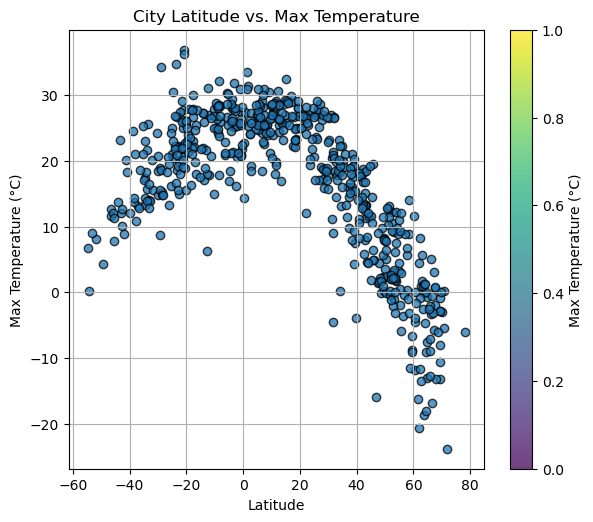

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6.7, 5.7))  # Equivalent to 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors="black", linewidths=1, alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.colorbar(label='Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.show()

Latitude Vs. Humidity

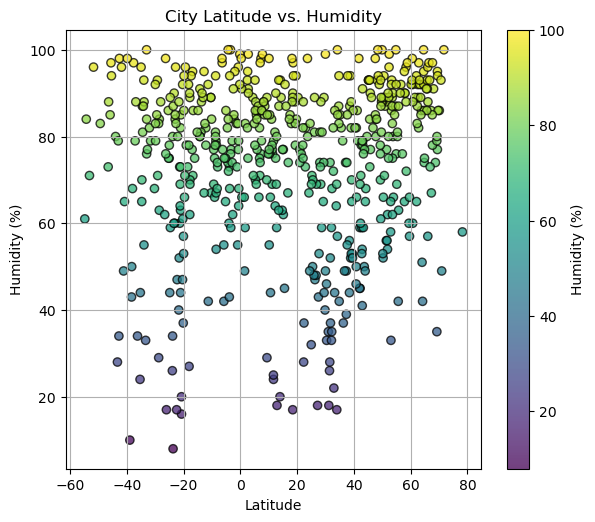

In [10]:
# Create a scatter plot for latitude vs. humidity
plt.figure(figsize=(6.7, 5.7))  # Dimensions: 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Humidity"], 
            edgecolor="black", linewidth=1, alpha=0.75, 
            c=city_df["Humidity"], cmap="viridis")
plt.colorbar(label='Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()


Latitude Vs. Cloudiness

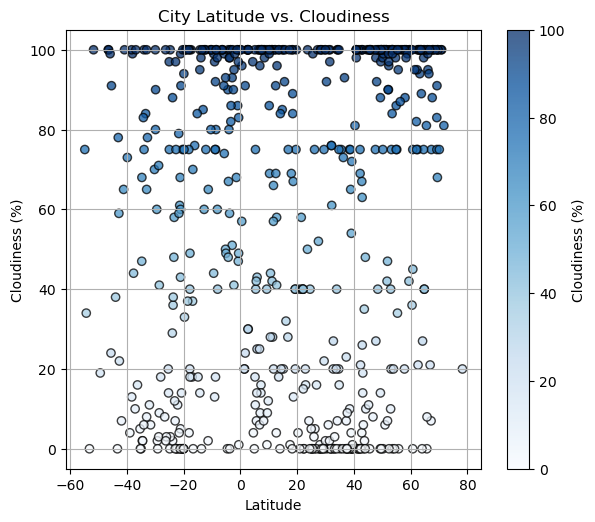

In [11]:
# Create a scatter plot for latitude vs. cloudiness
plt.figure(figsize=(6.7, 5.7))  # Dimensions: 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Cloudiness"], 
            edgecolor="black", linewidth=1, alpha=0.75, 
            c=city_df["Cloudiness"], cmap="Blues")

# Add titles and labels
plt.colorbar(label='Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("output_data/Fig3.png")

# Display the plot
plt.show()


Latitude vs. Wind Speed Plot

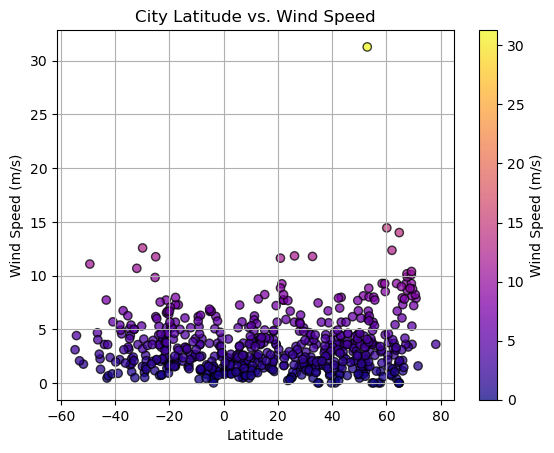

In [12]:
# Create a scatter plot for latitude vs. wind speed
plt.figure(figsize=(6.4, 4.8))  # Dimensions: 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Wind Speed"], 
            edgecolor="black", linewidth=1, alpha=0.75, 
            c=city_df["Wind Speed"], cmap="plasma")
plt.colorbar(label='Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("output_data/Fig4.png")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

In [13]:

# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label, title, filename):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = r_value**2
    plt.figure(figsize=(6.4, 4.8))
    plt.scatter(x, y, edgecolors="black", linewidths=1, alpha=0.75)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (x.min() + 5, y.min() + 5), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Print r-squared value
    print(f"The r-squared value is: {r_squared}")

    plt.savefig(filename)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_df[city_df['Lat'] >= 0]

north_hem_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,west bay,19.3667,-81.4167,28.04,78,40,3.60,KY,1730342360
4,tralee,52.2704,-9.7026,12.17,89,96,1.05,IE,1730342361
6,bodaybo,57.8506,114.1933,0.34,90,100,1.06,RU,1730342363
7,nichinan,31.6000,131.3667,21.37,74,100,4.68,JP,1730342365
9,bethel,41.3712,-73.4140,17.59,79,0,0.45,US,1730342367


In [15]:
# Southern Hemisphere

south_hemi_df = city_df[city_df['Lat'] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.15,79,10,6.73,SH,1730342357
1,uturoa,-16.7333,-151.4333,25.42,71,70,7.27,PF,1730342358
2,afaahiti,-17.7500,-149.2833,23.04,70,49,7.29,PF,1730342359
5,hithadhoo,-0.6000,73.0833,27.35,64,83,1.37,MV,1730342362
8,grytviken,-54.2811,-36.5092,0.27,84,34,4.41,GS,1730342366


Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7697225430879021


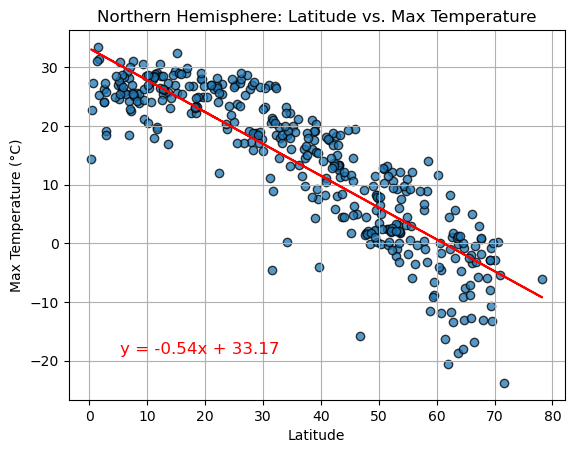

Northern Hemisphere DataFrame sample:
       City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
3  west bay  19.3667  -81.4167     28.04        78          40        3.60   
4    tralee  52.2704   -9.7026     12.17        89          96        1.05   
6   bodaybo  57.8506  114.1933      0.34        90         100        1.06   
7  nichinan  31.6000  131.3667     21.37        74         100        4.68   
9    bethel  41.3712  -73.4140     17.59        79           0        0.45   

  Country        Date  
3      KY  1730342360  
4      IE  1730342361  
6      RU  1730342363  
7      JP  1730342365  
9      US  1730342367  


In [16]:
# Generate a linear regression plot for latitude vs. maximum temperature
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Max Temp'],
                       'Latitude', 'Max Temperature (°C)',
                       'Northern Hemisphere: Latitude vs. Max Temperature',
                       'output_data/Northern_Lat_vs_MaxTemp.png')

# Display sample data
print("Northern Hemisphere DataFrame sample:")
print(north_hem_df.head())


The r-squared value is: 0.4100218987642291


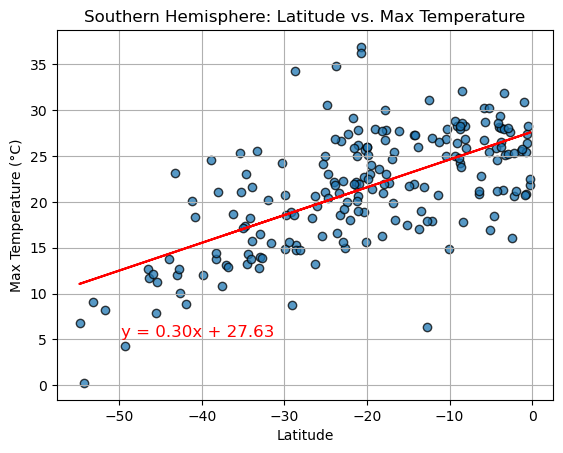

In [17]:
# Linear regression on Southern Hemisphere
linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Max Temp'],
                       'Latitude', 'Max Temperature (°C)',
                       'Southern Hemisphere: Latitude vs. Max Temperature',
                       'output_data/Southern_Lat_vs_MaxTemp.png')

Discussion about the linear relationship: 

There is a linear relationship between latitude and temperature. This relationship holds true for both hemispheres, north and south.
The r-squared value is not perfect, which indicate other factors affect temperature. 

The r-squared value is: 0.015440898269728517


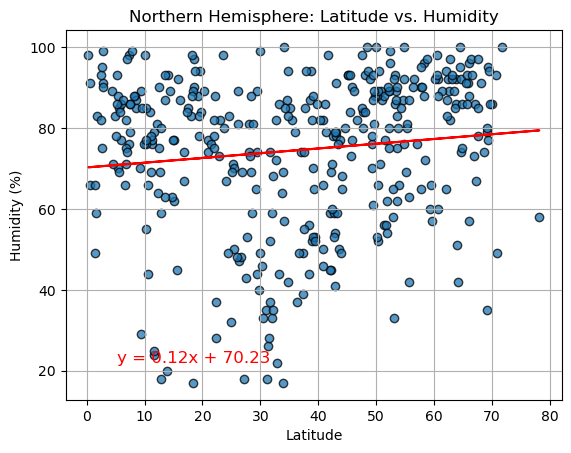

In [18]:
# Northern Hemisphere
# Plot Humidity vs. Latitude for Northern Hemisphere
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Northern Hemisphere: Latitude vs. Humidity',
                       'output_data/Northern_Lat_vs_Humidity.png')

The r-squared value is: 0.010476217224599797


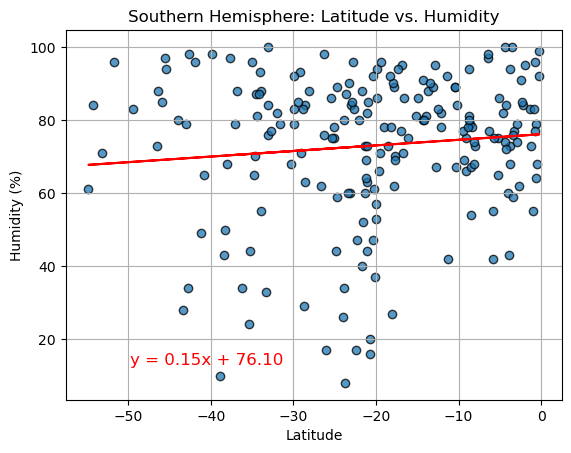

In [19]:
# Southern Hemisphere

# Plot Humidity vs. Latitude for Southern Hemisphere

linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Southern Hemisphere: Latitude vs. Humidity',
                       'output_data/Southern_Lat_vs_Humidity.png')

Discussion about the linear relationship:

In the northern hemisphere, as latitude increases, there is a decrease in humidity. The increase is small.
In the southern hemisphere, as latitude increases, there is an increase in humidity. The increase is also small.

The value of the r-squared test suggests there is a weak relationship between latitude and humidity.

Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.03586689126130136


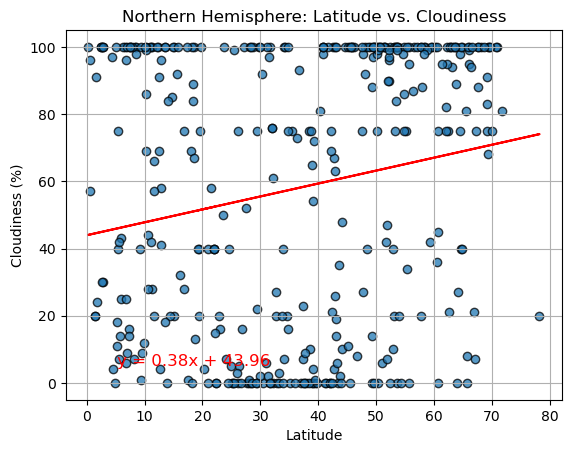

In [20]:
# Northern Hemisphere
# Plot Cloudiness vs. Latitude for Northern Hemisphere
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Northern Hemisphere: Latitude vs. Cloudiness',
                       'output_data/Northern_Lat_vs_Cloudiness.png')

The r-squared value is: 0.07521889716812892


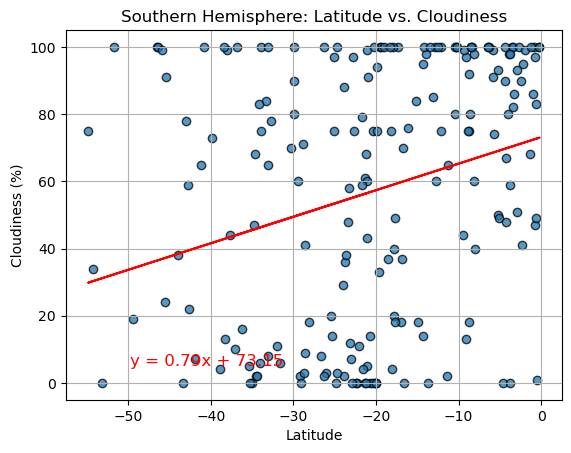

In [21]:
# Plot Cloudiness vs. Latitude for Southern Hemisphere
linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Southern Hemisphere: Latitude vs. Cloudiness',
                       'output_data/Southern_Lat_vs_Cloudiness.png')

**Discussion about the linear relationship:** 

Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.05480152976445299


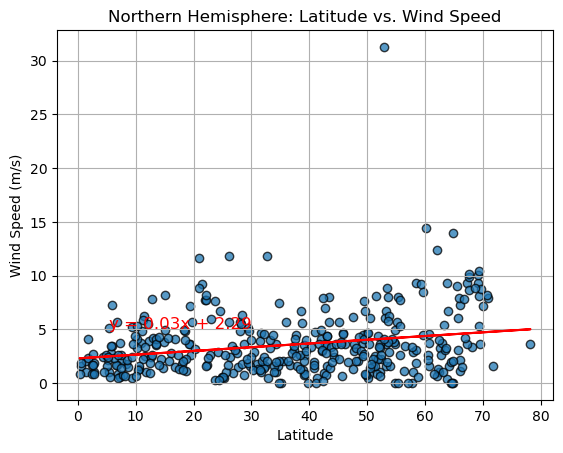

In [22]:
#Northern Hemisphere
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Northern Hemisphere: Latitude vs. Wind Speed',
                       'output_data/Northern_Lat_vs_WindSpeed.png')

The r-squared value is: 0.023536379405897964


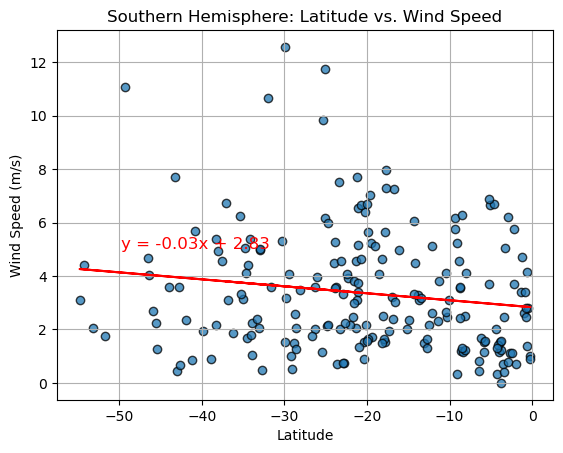

In [23]:
# Southern Hemisphere
linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Southern Hemisphere: Latitude vs. Wind Speed',
                       'output_data/Southern_Lat_vs_WindSpeed.png')

**Discussion about the linear relationship:** 

The low r-squared values shows there is a weak relationship between wind speed and latitude in both hemispheres.

